In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-05.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

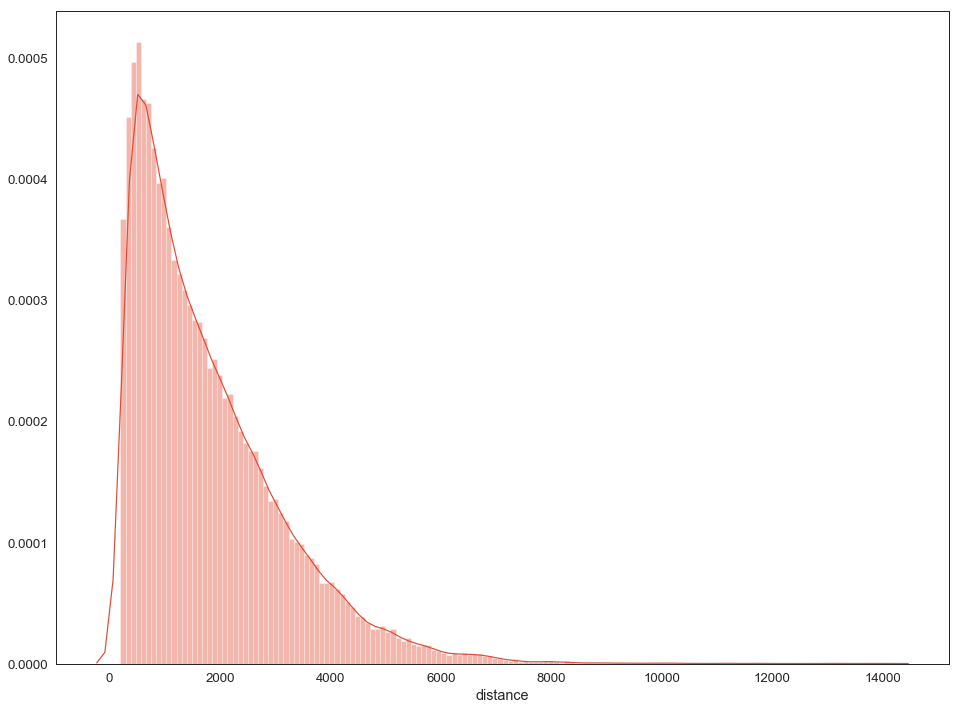

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 150)

In [5]:
distance = df["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
beta,4027.756112,-2.076047e+06,inf,1.187883e-08
gamma,3653.082605,-2.051023e+06,inf,1.693602e-08
burr,3438.576428,-1.888075e+06,inf,1.703502e-07
norm,6156.136435,-1.793714e+06,inf,6.487422e-07
lognorm,3601.299486,-1.693093e+06,inf,2.698422e-06


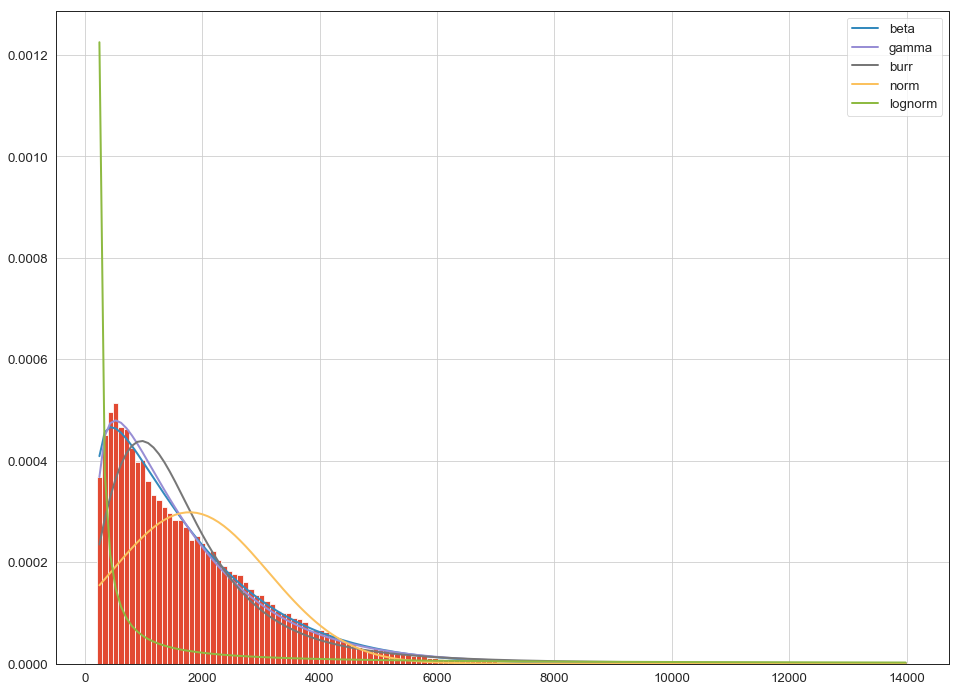

In [6]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=150)
f.fit()
f.summary()

In [7]:
f.get_best(method = 'sumsquare_error')

{'beta': (1.1509111924868214,
  11.025718914575856,
  199.7625396397401,
  16742.887752795017)}

In [8]:
f.get_best(method = 'aic')

{'burr': (2.5831295707603066,
  0.6490018540688496,
  -11.060637291586573,
  1856.7478939622563)}

In [9]:
f.get_best(method = 'bic')

{'beta': (1.1509111924868214,
  11.025718914575856,
  199.7625396397401,
  16742.887752795017)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,4027.756112,-2.076047e+06,inf,1.187883e-08
burr,3438.576428,-1.888075e+06,inf,1.703502e-07
bradford,2995.501543,-1.807093e+06,inf,5.366417e-07
alpha,3290.310971,-1.803823e+06,inf,5.620867e-07
norm,6156.136435,-1.793714e+06,inf,6.487422e-07


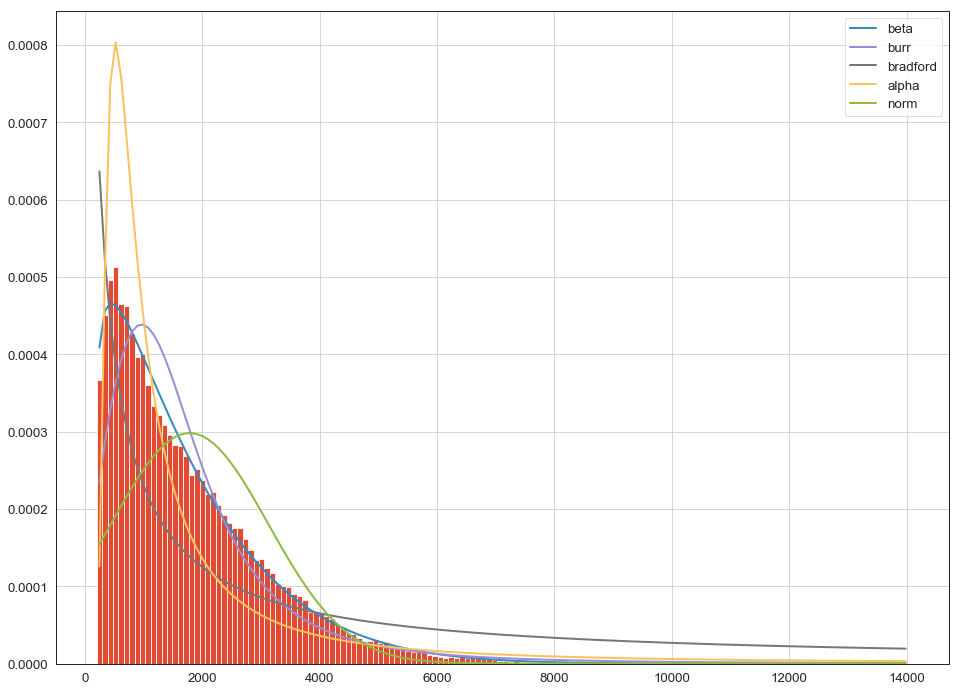

In [10]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi,4097.108764,-1.933965e+06,inf,8.893195e-08
expon,3524.571395,-1.925780e+06,inf,9.988214e-08
dgamma,4292.680985,-1.806421e+06,inf,5.417771e-07
cosine,3108.142391,-1.714772e+06,inf,1.985143e-06
chi2,92686.232599,-1.681926e+06,inf,3.160965e-06


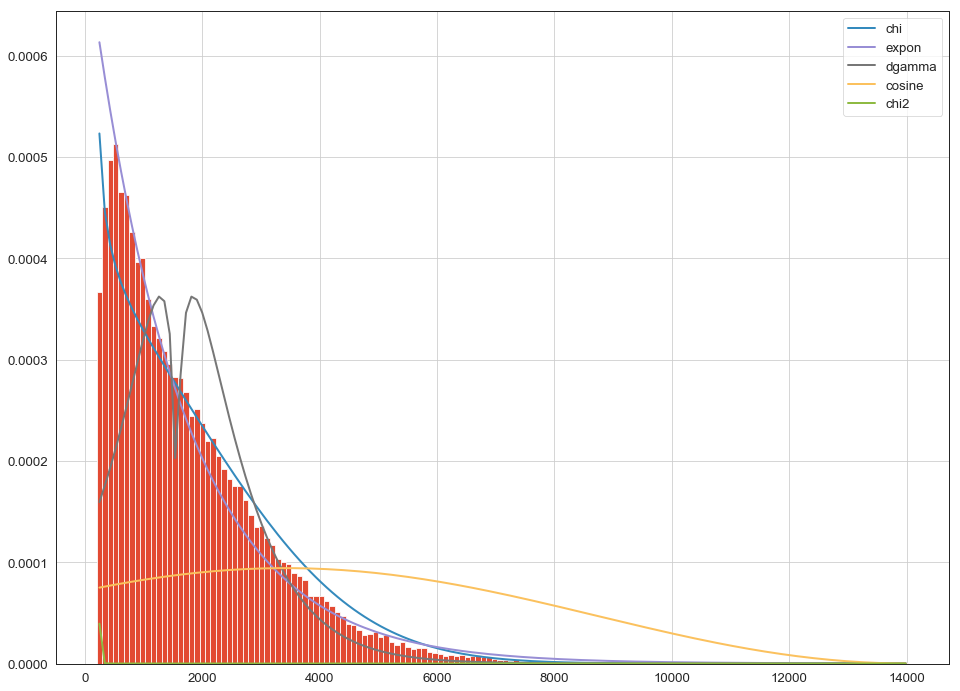

In [11]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,3653.082605,-2.051023e+06,inf,1.693602e-08
exponnorm,3544.504978,-1.975258e+06,inf,4.954345e-08
fatiguelife,3545.011460,-1.940024e+06,inf,8.161619e-08
f,3545.166293,-1.901407e+06,inf,1.410301e-07
fisk,3350.138681,-1.891959e+06,inf,1.612562e-07


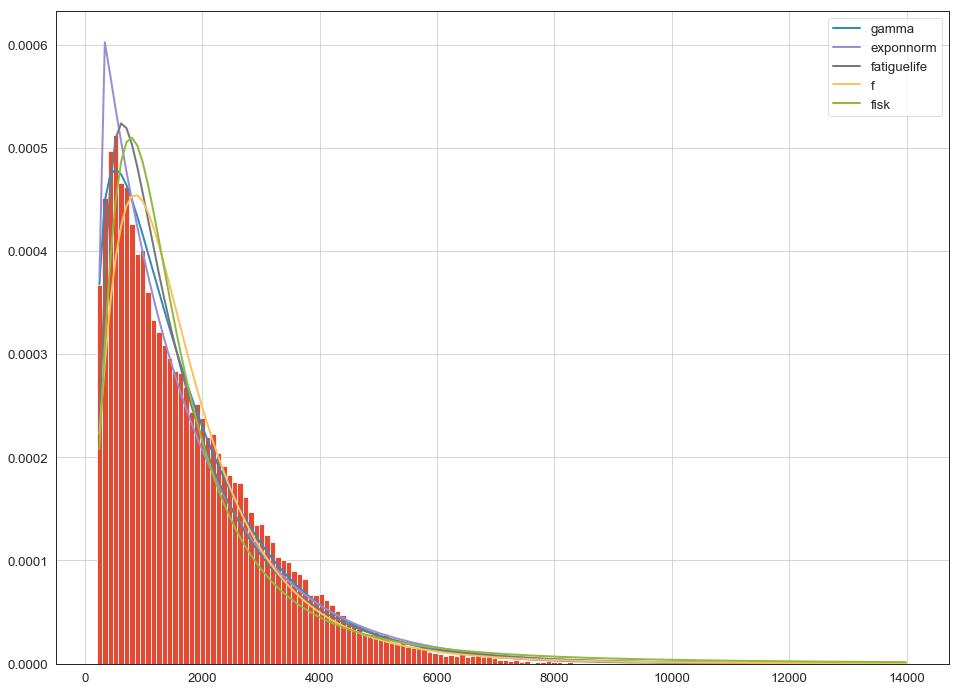

In [12]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
genexpon,3536.261588,-1.923540e+06,inf,1.030530e-07
levy,3198.943715,-1.819965e+06,inf,4.472537e-07
loggamma,6303.658595,-1.792661e+06,inf,6.583889e-07
lognorm,3601.299486,-1.693093e+06,inf,2.698422e-06
gengamma,3357.521891,-1.658866e+06,inf,4.381645e-06


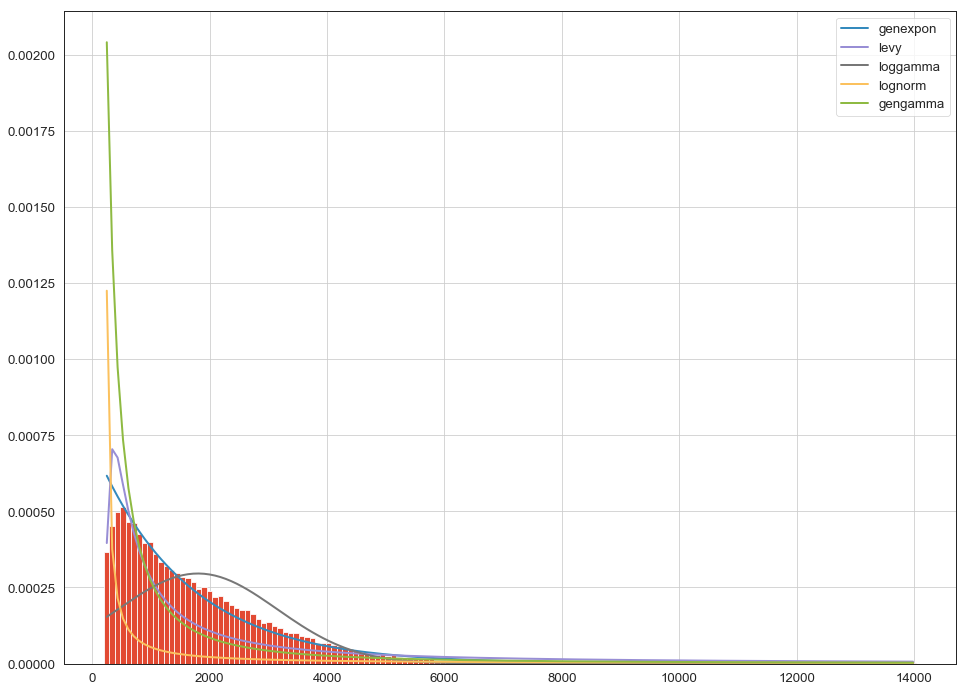

In [13]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,3653.082614,-2.051023e+06,inf,1.693602e-08
t,3938.588887,-1.804339e+06,inf,5.579958e-07
logistic,4373.180372,-1.802956e+06,inf,5.691219e-07
powerlaw,2971.589457,-1.749012e+06,inf,1.221933e-06
pareto,3304.758833,-1.672393e+06,inf,3.618087e-06


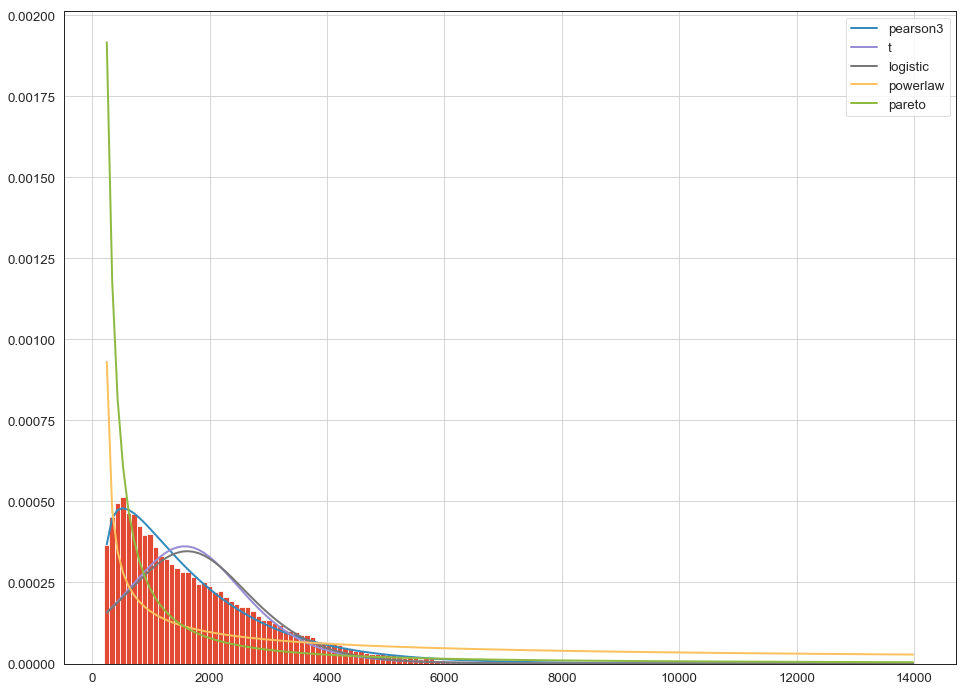

In [14]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins=150)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
beta,4027.756112,-2.076047e+06,inf,1.187883e-08
gamma,3653.082605,-2.051023e+06,inf,1.693602e-08
pearson3,3653.082614,-2.051023e+06,inf,1.693602e-08
chi,4097.108764,-1.933965e+06,inf,8.893195e-08
gengamma,3357.521891,-1.658866e+06,inf,4.381645e-06


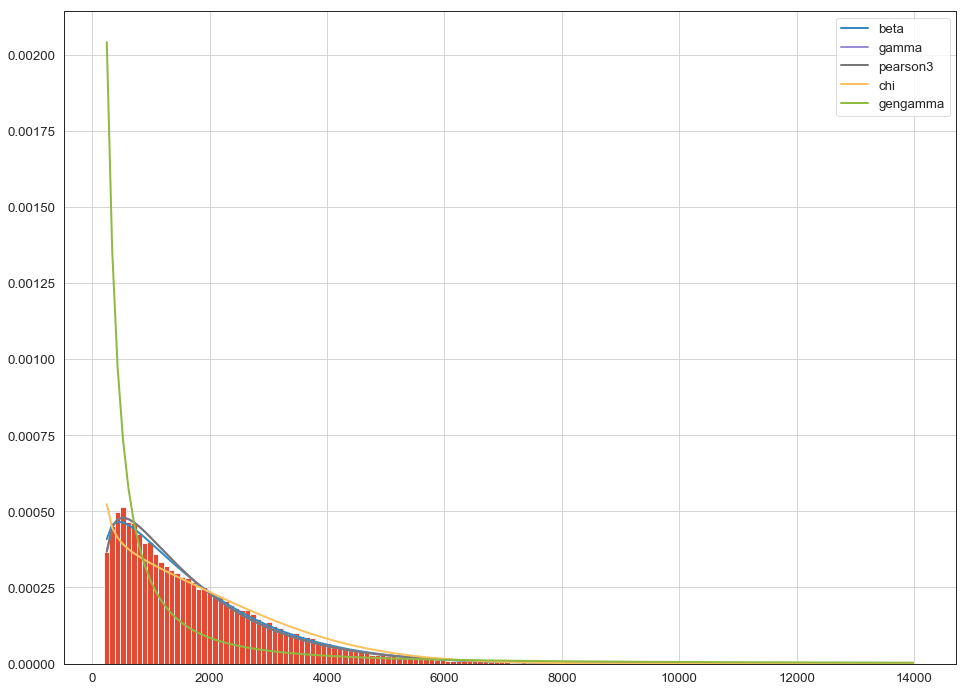

In [15]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma', 'gengamma', 'pearson3'], bins=150)

f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

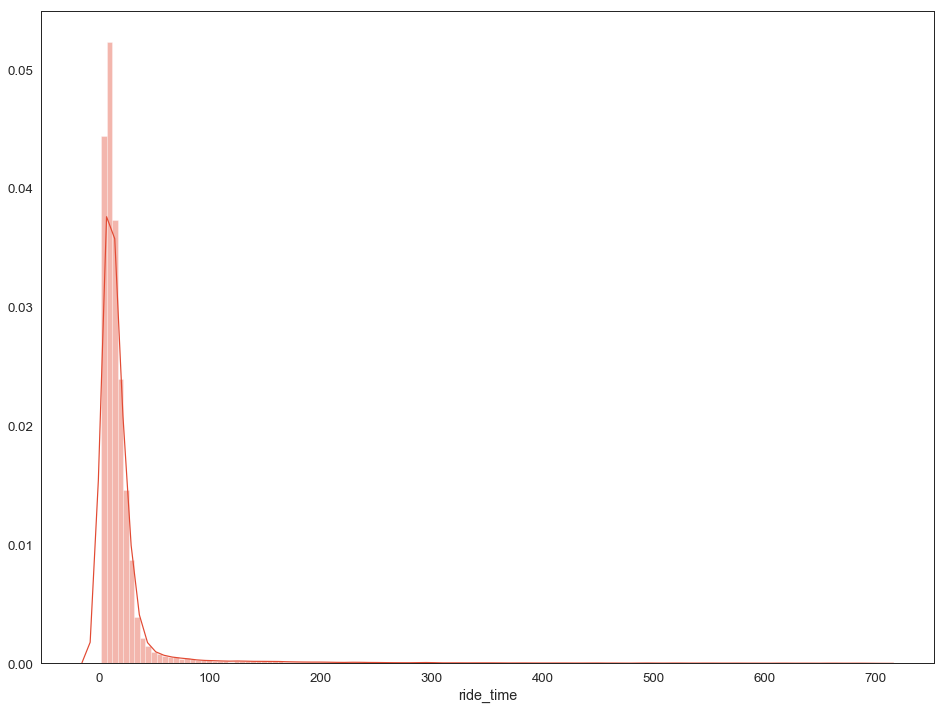

In [16]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 140)

In [17]:
rides = df["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
burr,2921.958772,-1.361860e+06,0.039429,0.000294
lognorm,3285.783005,-1.323262e+06,0.069011,0.000509
gamma,6286.306045,-1.312653e+06,0.111172,0.000591
beta,4907.749626,-1.294524e+06,0.201022,0.000765
norm,8402.387995,-1.162494e+06,1.305185,0.004965


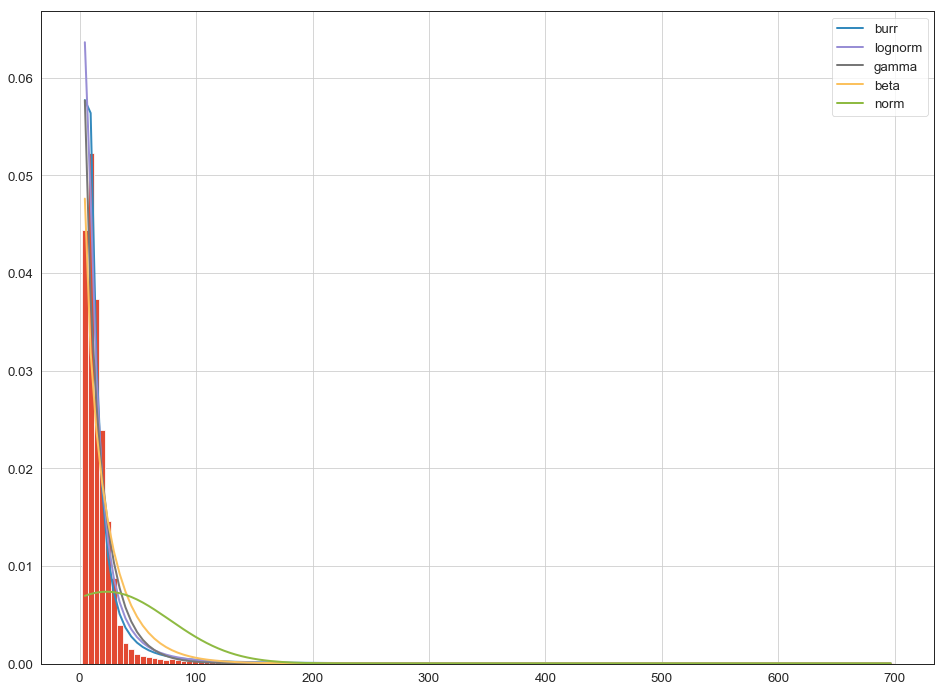

In [18]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins = 140)
f.fit()
f.summary()

In [19]:
f.get_best(method = 'sumsquare_error')

{'burr': (1.5718226606233783,
  6.173437556615603,
  -0.026667305350788005,
  2.9264213297918733)}

In [20]:
f.get_best(method = 'aic')

{'burr': (1.5718226606233783,
  6.173437556615603,
  -0.026667305350788005,
  2.9264213297918733)}

In [21]:
f.get_best(method = 'bic')

{'burr': (1.5718226606233783,
  6.173437556615603,
  -0.026667305350788005,
  2.9264213297918733)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
alpha,2847.951885,-1.394449e+06,0.026502,0.000186
burr,2921.958772,-1.361860e+06,0.039429,0.000294
beta,4907.749626,-1.294524e+06,0.201022,0.000765
norm,8402.387995,-1.162494e+06,1.305185,0.004965
bradford,1988.904436,-1.154216e+06,1.906037,0.005582


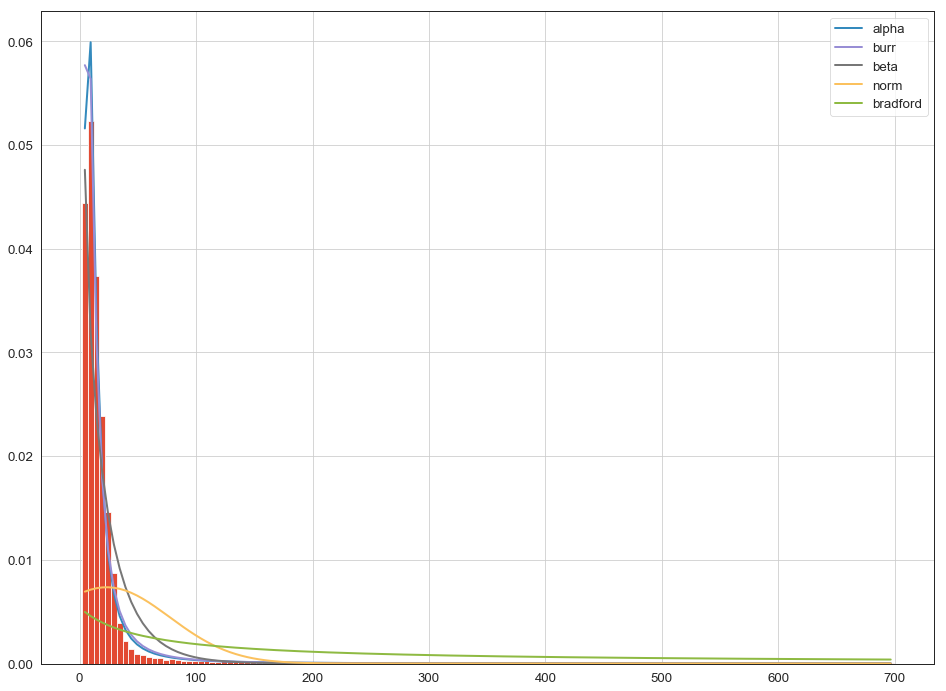

In [22]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
expon,5462.137726,-1.303939e+06,0.202194,0.000669
dgamma,3799.548745,-1.239963e+06,0.151960,0.001656
chi,6135.229106,-1.228777e+06,0.550888,0.001941
chi2,2552.799447,-1.225233e+06,0.526416,0.002041
cosine,2109.804666,-1.142983e+06,2.555813,0.006545


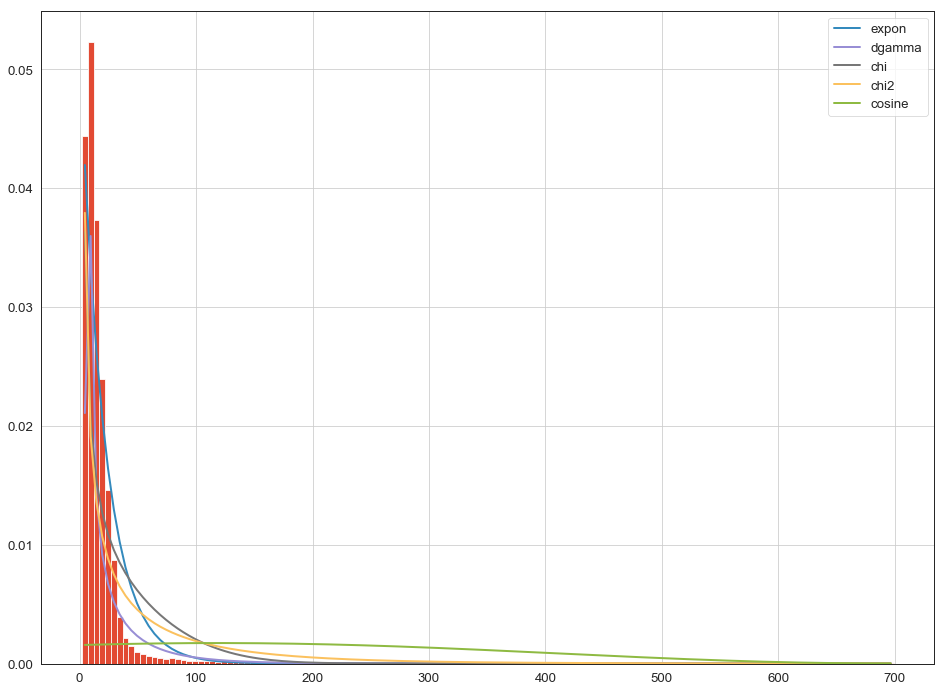

In [23]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
fisk,3024.288136,-1.392275e+06,0.032751,0.000191
f,2958.059097,-1.343543e+06,0.045770,0.000382
exponnorm,5624.634788,-1.317275e+06,0.184070,0.000554
gamma,6286.306045,-1.312653e+06,0.111172,0.000591
fatiguelife,3918.423091,-1.290866e+06,0.166122,0.000805


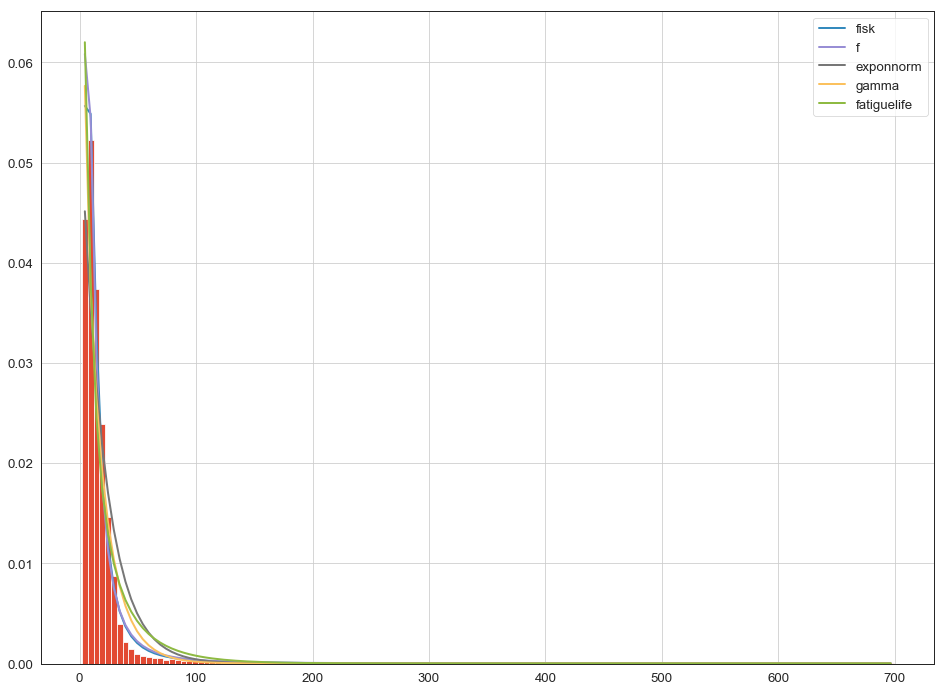

In [24]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,3285.783005,-1.323262e+06,0.069011,0.000509
genexpon,5468.140340,-1.303906e+06,0.202193,0.000669
gengamma,3846.404855,-1.287267e+06,0.167821,0.000847
levy,2343.427511,-1.237385e+06,0.257711,0.001718
loggamma,7416.920048,-1.160104e+06,1.384455,0.005135


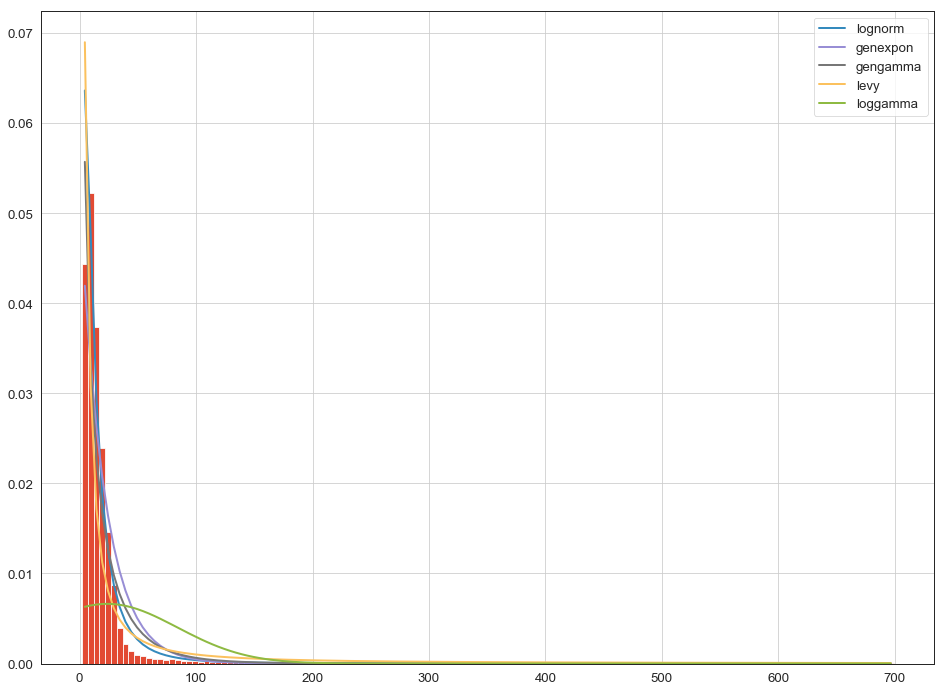

In [25]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
t,3168.931035,-1.329336e+06,0.054728,0.000467
pearson3,4690.476882,-1.289945e+06,0.205438,0.000816
logistic,8405.815813,-1.216894e+06,0.343445,0.002297
pareto,2474.814513,-1.202109e+06,0.282615,0.002832
powerlaw,2057.879524,-1.187169e+06,1.123289,0.003499


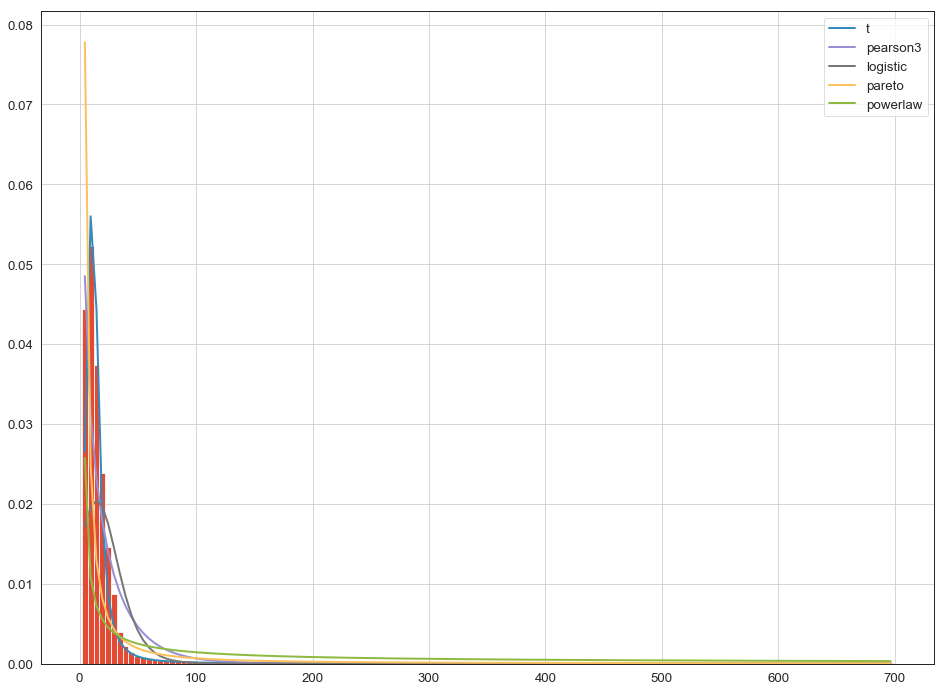

In [26]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins = 140)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
alpha,2847.951885,-1.394449e+06,0.026502,0.000186
burr,2921.958772,-1.361860e+06,0.039429,0.000294
f,2958.059097,-1.343543e+06,0.045770,0.000382
lognorm,3285.783005,-1.323262e+06,0.069011,0.000509


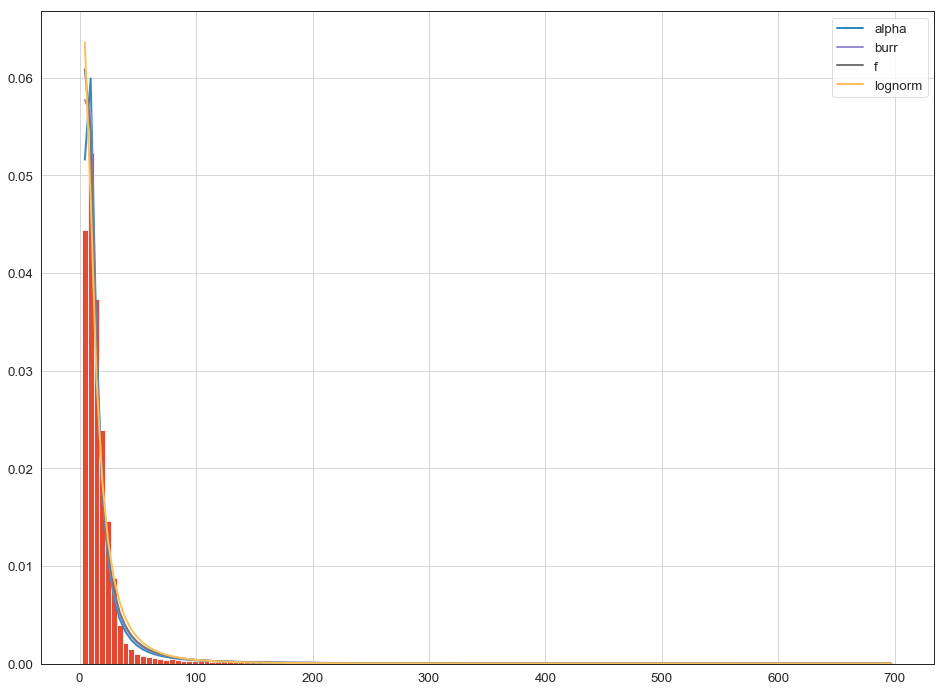

In [27]:
f = Fitter(rides,
           distributions= ['alpha','burr','lognorm', 'f'], bins = 140)
f.fit()
f.summary()